## Question 1

In [31]:
import cv2 as cv
import numpy as np

img = cv.imread("images/boat.jpg")


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img_copy = img.copy()

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
#Filter based on the size of the bounding box
    if w > 50 and h > 50:  # Adjust the values as needed
        cv.rectangle(img_copy, (x,y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv.imshow('Result', img_copy)
cv.waitKey(0)
cv.destroyAllWindows()


## Question 2

In [39]:
def apply_morphology(image, operation, size):
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (size, size))
    if operation == 'erosion':
        return cv.erode(image, kernel, iterations=1)
    elif operation == 'dilation':
        return cv.dilate(image, kernel, iterations=1)
    elif operation == 'opening':
        return cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
    elif operation == 'closing':
        return cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
    else:
        return image

def update(val):
    global current_size
    current_size = val
    result = apply_morphology(segmented_leaf.copy(), operation, current_size)
    cv.imshow('Morphology Transformation', result)


img = cv.imread("images/leaf.jfif", cv.IMREAD_GRAYSCALE)

_, mask = cv.threshold(img, 0, 255, cv.THRESH_BINARY)

segmented_leaf = cv.bitwise_and(img, img, mask=mask)

operation = 'dilation'

current_size = 5

cv.namedWindow('Morphology Transformation')
cv.createTrackbar('Size', 'Morphology Transformation', current_size, 21, update)
cv.createTrackbar('Operation', 'Morphology Transformation', 0, 5, update)

cv.waitKey(0)
cv.destroyAllWindows()


## Question 3

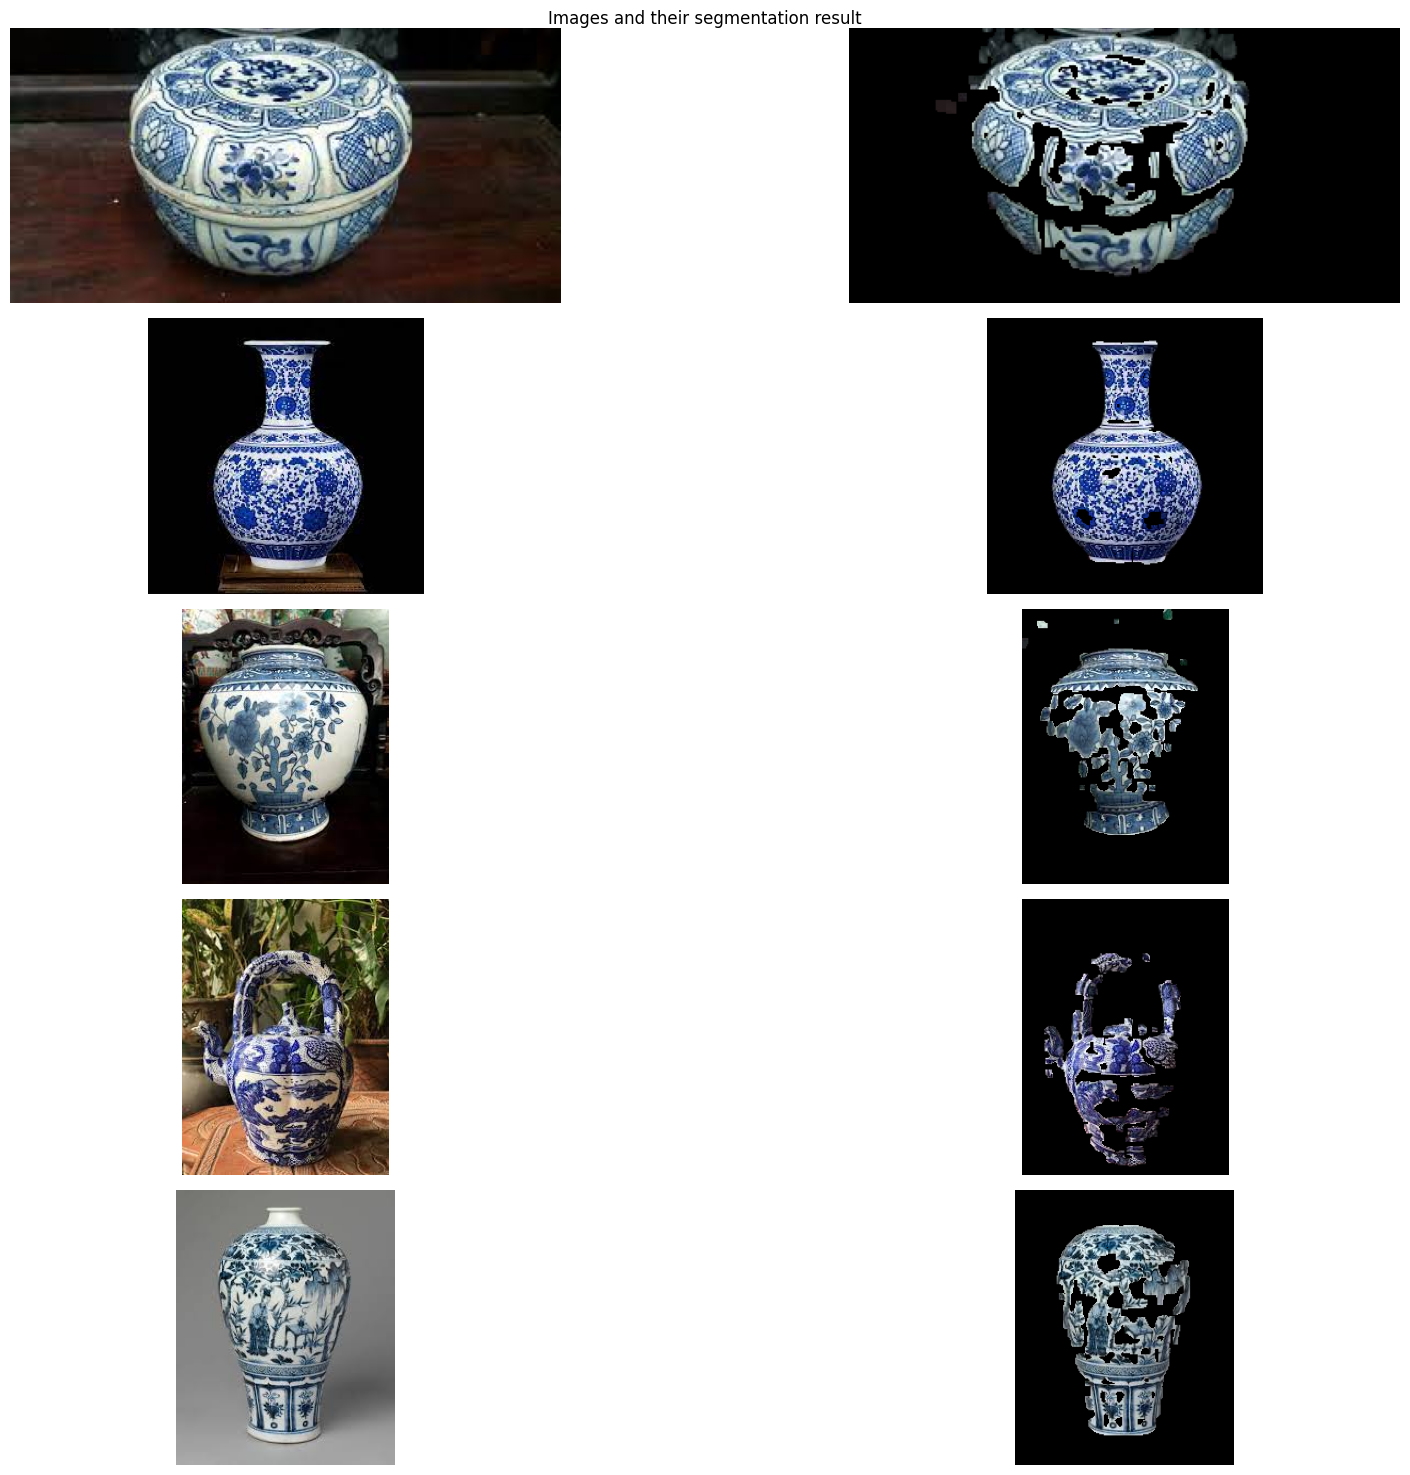

In [97]:
def color_seg(img, color_low, color_high, smooth=True):
    img_copy = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    
    return cv.bitwise_and(img_copy, img_copy, mask=mask)

blue_low = (70, 15, 30)
blue_high = (180, 225, 255)

imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [color_seg(img, blue_low, blue_high) for img in imgs]

fig, ax = plt.subplots(5, 2, figsize=(20, 15))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
plt.suptitle("Images and their segmentation result")
plt.tight_layout()
plt.show()